# Exploration of Issue Data from React Repository

In [1]:
import operator
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from classifier import *
from issues import *

## Issue Data Summary

In [2]:
with open('data/react/react_issues_closed.json') as f:
    closed_issues = json.load(f)
print(str(len(closed_issues)) + ' closed issues')
with open('data/react/react_issues_open.json') as f:
    open_issues = json.load(f)
print(str(len(open_issues)) + ' open issues')

5575 closed issues
379 open issues


In [3]:
get_issue_by_title(closed_issues, "Extract react prop from ref")

[{'url': 'https://api.github.com/repos/facebook/react/issues/12903',
  'repository_url': 'https://api.github.com/repos/facebook/react',
  'labels_url': 'https://api.github.com/repos/facebook/react/issues/12903/labels{/name}',
  'comments_url': 'https://api.github.com/repos/facebook/react/issues/12903/comments',
  'events_url': 'https://api.github.com/repos/facebook/react/issues/12903/events',
  'html_url': 'https://github.com/facebook/react/issues/12903',
  'id': 326290102,
  'number': 12903,
  'title': 'Extract react prop from ref',
  'user': {'login': 'gk159yo',
   'id': 18729755,
   'avatar_url': 'https://avatars3.githubusercontent.com/u/18729755?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/gk159yo',
   'html_url': 'https://github.com/gk159yo',
   'followers_url': 'https://api.github.com/users/gk159yo/followers',
   'following_url': 'https://api.github.com/users/gk159yo/following{/other_user}',
   'gists_url': 'https://api.github.com/users/gk159yo/gists{/gist_

### Issues that are classified as trivial or documentation changes are labeled 'True', all other issues are labeled as 'False'.

Text(0.5,1,'open issue labels')

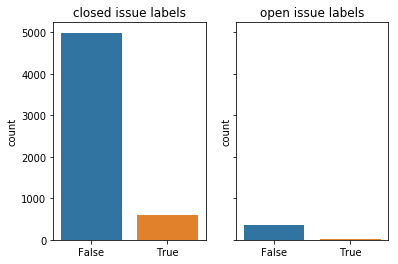

In [4]:
closed_labels = classify_issues(closed_issues)
open_labels = classify_issues(open_issues)

ig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(closed_labels, ax=ax1).set_title("closed issue labels")
sns.countplot(open_labels, ax=ax2).set_title("open issue labels")

In [5]:
pos_issues_closed = [issue for (i,issue) in enumerate(closed_issues) if closed_labels[i]]
neg_issues_closed = [issue for (i,issue) in enumerate(closed_issues) if not closed_labels[i]]
pos_issues_open = [issue for (i,issue) in enumerate(open_issues) if open_labels[i]]
neg_issues_open = [issue for (i,issue) in enumerate(open_issues) if not open_labels[i]]

## Exploration of Positive Labeled Issues

In [6]:
# Print a sample of positive label titles
print("positive label titles: ")
for issue in pos_issues_closed[:20]:
    print ("\t" + "\"" + issue['title'] + "\"")

positive label titles: 
	"fix docs rake "update_version" command to strip trailing spaces"
	"docs don't even mention reconciliation!"
	"jsx page gives 404 - linked from "why react" blog post"
	"stop requiring docblock for jsx transformer"
	"document forms changes / best practices"
	"better event docs"
	"few issues in the (upcoming) doc"
	"docblock parsing fails with \r\n"
	"link to cdnjs in docs"
	"old jsfiddle links in docs"
	"generate docs using jsdoc (or something)."
	"react broken in safari 5.1.1"
	"fails on whole-document rendering"
	"support onmouseover"
	"docco-style documentation"
	"documentation - createclass and rendercomponent too vague, add more links"
	"fix direct uses of document and global"
	"get rid of sanitize dependency in docs"
	"add a link in each warning to doc pages "
	"document selection and composition events on reference page"


### The classifier misclassifies some examples as documentation/trivial issues that are more complex upon manual inspection. Example below is an issue that was flagged despite being a significant code change with a lot of discussion around it.

In [7]:
misclass_issue = get_issue_by_title(pos_issues_closed, "null props considered differently in getdefaultprops vs. isrequired")
print('title: ' + misclass_issue[0]['title'])
print('')
print('body: ' + misclass_issue[0]['body'])

title: null props considered differently in getdefaultprops vs. isrequired

body: in the case a `null` argument is passed to a property marked as `isrequired`:http://jsfiddle.net/jeanlauliac/0n6snb6b/1/we'll get a proper warning in the console: `warning: required prop `name` was not specified in `hello`.` (though it should probably be "prop was null" and not "prop was not specified", but anyway)on the other hand, the default value is only used when the prop is `undefined`, but not when it's `null`. is this the explicitly wanted behavior? if it is, then we should probably make the documentation explicit about it (http://facebook.github.io/react/docs/reusable-components.html), giving the entire responsibility to component callers of safeguarding against `null`.


## Exploration of Negative Labeled Issues

In [8]:
print("negative label titles: ")
for issue in neg_issues_closed[:20]:
    print ("\t" + "\"" + issue['title'] + "\"")

negative label titles: 
	"can't require() react-tools module"
	"write tests for react-tools module"
	"must adding comments for jsx?"
	"small update to bower command"
	"make valid npm release"
	"react in requirejs ?"
	"is es5-sham required for ie8?"
	"uncaught syntaxerror: unexpected token < "
	"work with compile-to-js languages (like coffeescript)"
	"the name "jsx" is already taken, use "xjs" instead?"
	"jsx not able to watch subdirs"
	"jsx whitespace coalescing should work like regular html"
	"automatically bind scope of all user provided methods."
	"jsx offline transform exits with error code 1 on any change (ubuntu 12.10)"
	"allow namespacing in component names in jsx"
	"ordering of componentdidmount events"
	"preserve line numbers in "grunt test""
	"grunt test just hangs"
	"bin/jsx should not relativize required module ids unless --relativize is passed"
	"support comments in jsx"


### The classifier misses some examples that upon further inspection are clearly simple changes. Example below is an issue that was resolved by simply changing a single URL in a markdown file.

In [9]:
misclass_issue = get_issue_by_title(neg_issues_closed, 'small update to bower command')
print('title: ' + misclass_issue[0]['title'])
print('')
print('body: ' + misclass_issue[0]['body'])

title: small update to bower command

body: it could be preferable to use:```bower install --save react```so that the installation is automatically saved in the `bower.json`.


## Comparsion of Issue Classes

In [10]:
neg_issues_freqs = sorted(get_word_freq_title(neg_issues_closed).items(), key=lambda x: x[1], reverse=True)
pos_issues_freqs = sorted(get_word_freq_title(pos_issues_closed).items(), key=lambda x: x[1], reverse=True)

# print top 20 words for negative issues
print("Top words in Negative Issue Titles: ")
for (word, freq) in neg_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issue Titles: ")
for (word, freq) in pos_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))

Top words in Negative Issue Titles: 
	react: 0.024837738859276984
	component: 0.01232822074767033
	error: 0.010624025526668843
	render: 0.007251894557453135
	using: 0.00645418615613329
	event: 0.00645418615613329
	dom: 0.0063816672105587585
	jsx: 0.006345407737771493
	components: 0.006309148264984227
	input: 0.005874034591537039
	element: 0.005438920918089851
	doesnt: 0.005402661445302585
	property: 0.005148845135791726
	rendering: 0.004931288299068131
	add: 0.004895028826280866
	support: 0.004532434098408209
	attribute: 0.004532434098408209
	value: 0.004459915152833678
	props: 0.0042786177888973495
	state: 0.004242358316110084
	work: 0.004133579897748286
	function: 0.004097320424961021
	setstate: 0.004024801479386489
	update: 0.003879763588237427
	null: 0.0038435041154501613
	undefined: 0.0038072446426628955
	cannot: 0.0036259472787265675
	html: 0.00351716886036477
	children: 0.003444649914790239

Top words in Positive Issue Titles: 
	docs: 0.0423981450811527
	documentation: 0.0251738

In [11]:
#TODO: list words with biggest differences between the two classes

In [12]:
neg_issues_freqs = sorted(get_word_freq_body(neg_issues_closed).items(), key=lambda x: x[1], reverse=True)
pos_issues_freqs = sorted(get_word_freq_body(pos_issues_closed).items(), key=lambda x: x[1], reverse=True)

# print top 20 words for negative issues
print("Top words in Negative Issue Bodies: ")
for (word, freq) in neg_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issue Bodies: ")
for (word, freq) in pos_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))

Top words in Negative Issue Bodies: 
	react: 0.01586811577096404
	component: 0.007496723777356081
	render: 0.006416251274927288
	return: 0.006337561400800821
	div: 0.006155969383585897
	function: 0.005471972785409686
	like: 0.005223797028549292
	using: 0.004564012699335071
	error: 0.004488349358828853
	versions: 0.004473216690727609
	issue: 0.004267412404550696
	expected: 0.004267412404550696
	current: 0.00420990826576597
	work: 0.004001077445968808
	code: 0.0035652566046529928
	module: 0.003435115658982298
	behavior: 0.003389717654678567
	get: 0.003087064292653695
	browser: 0.0030658785573119537
	one: 0.0030325866874892178
	other: 0.002978109082324741
	bug: 0.002890339607337528
	problem: 0.002817702800451559
	im: 0.0028086231995908127
	components: 0.002775331329768077
	value: 0.002757172128046584
	only: 0.002754145594426336
	just: 0.0027329598590845948
	all: 0.0027238802582238487
	request: 0.002693614922021361

Top words in Positive Issue Bodies: 
	react: 0.0170586328154226
	x: 0.0097

In [13]:
#TODO: list words with biggest differences between the two classes
neg_freqs = get_word_freq_body(neg_issues_closed)
pos_freqs = get_word_freq_body(pos_issues_closed)
freq_diffs = {}
for word in neg_freqs:
    freq_diffs[word] = neg_freqs[word] - pos_freqs.get(word, 0)
for word in pos_freqs:
    if word not in neg_freqs:
        freq_diffs[word] = - pos_freqs[word]
freq_diffs = sorted(freq_diffs.items(), key=lambda x: x[1], reverse=True)
# print top 20 words for negative issues
print("Top words in Negative Issue Bodies compared to Positive Issues: ")
for (word, freq) in freq_diffs[:20]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issue Bodies compared to Negative Issues: ")
for (word, freq) in freq_diffs[:-20:-1]:
    print("\t" + word + ": " + str(freq))

Top words in Negative Issue Bodies compared to Positive Issues: 
	div: 0.003911412434188187
	return: 0.0032201211933040007
	module: 0.0031857204423825524
	render: 0.0025506254176312308
	equal: 0.0019499324269664703
	0: 0.0014042894840672789
	function: 0.0013569517115138837
	error: 0.0013459696296720582
	var: 0.0013173426688782325
	other: 0.0012074030444665469
	expected: 0.0011998512403738246
	unexpected: 0.001174412567484813
	multiple: 0.001133003395155935
	one: 0.0010873039980112019
	1: 0.0010662800169540258
	modules: 0.0010458436500383973
	case: 0.0010376821160759998
	element: 0.0010307842733092078
	name: 0.0009992040702671882
	compiling: 0.0009836234265808341

Top words in Positive Issue Bodies compared to Negative Issues: 
	x: -0.007901413674380102
	documentation: -0.005312118113574581
	docs: -0.00407532356834764
	release: -0.0018201149898649047
	update: -0.001627893459293084
	about: -0.0015156766696872625
	repo: -0.0014605451031968546
	link: -0.001318672707258221
	document: -0.001

In [14]:
#TODO: list words with biggest differences between the two classes
neg_freqs = get_word_freq_title(neg_issues_closed)
pos_freqs = get_word_freq_title(pos_issues_closed)
freq_diffs = {}
for word in neg_freqs:
    freq_diffs[word] = neg_freqs[word] - pos_freqs.get(word, 0)
for word in pos_freqs:
    if word not in neg_freqs:
        freq_diffs[word] = - pos_freqs[word]
freq_diffs = sorted(freq_diffs.items(), key=lambda x: x[1], reverse=True)
# print top 20 words for negative issues
print("Top words in Negative Issue Titles compared to Positive Issues: ")
for (word, freq) in freq_diffs[:20]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issue Titles compared to Negative Issues: ")
for (word, freq) in freq_diffs[:-20:-1]:
    print("\t" + word + ": " + str(freq))

Top words in Negative Issue Titles compared to Positive Issues: 
	error: 0.006317963916864271
	dom: 0.00406301865143322
	attribute: 0.0035387275730686925
	element: 0.003120272358964313
	svg: 0.002673400479535431
	using: 0.002479360054775224
	work: 0.0024774023555157593
	attributes: 0.0024195841700245715
	component: 0.002391155494275165
	react: 0.0023137242849146124
	property: 0.0021677255597731767
	value: 0.0021412665937081397
	render: 0.0019521264223090473
	context: 0.0019021510442806232
	elements: 0.0018658915714933574
	inside: 0.0018492331121505493
	event: 0.0018168890378822133
	errors: 0.0018129736393632837
	child: 0.0017933726259188258

Top words in Positive Issue Titles compared to Negative Issues: 
	docs: -0.042253107190003636
	documentation: -0.02513763916914715
	document: -0.022818990610021614
	link: -0.010268300761841669
	doc: -0.006955945677376615
	update: -0.006057301665157737
	links: -0.0059622391520370984
	page: -0.004108105786525435
	reactlink: -0.0029811195760185492
	tu

In [15]:
print("Positive issue data summary ")
pos_df = pd.DataFrame({'body length': [len(issue['body']) for issue in pos_issues_closed],
                      'comments': [issue['comments'] for issue in pos_issues_closed],
                      'lines of code': [get_num_code_lines(issue) for issue in pos_issues_closed]})
pos_df.describe()

Positive issue data summary 


,body length,comments,lines of code
count,587.000000,587.000000,587.000000
mean,905.272572,5.954003,145.047700
std,1282.587430,13.377797,606.042647
min,11.000000,0.000000,0.000000
25%,318.000000,2.000000,0.000000
50%,562.000000,3.000000,0.000000
75%,1048.000000,6.000000,0.000000
max,14900.000000,254.000000,7643.000000


In [16]:
print("Negative issue datary summary: ")
neg_df = pd.DataFrame({'body length': [len(issue['body']) for issue in neg_issues_closed],
                      'comments': [issue['comments'] for issue in neg_issues_closed],
                      'lines of code': [get_num_code_lines(issue) for issue in neg_issues_closed]})
neg_df.describe()

Negative issue datary summary: 


,body length,comments,lines of code
count,4988.000000,4988.000000,4988.000000
mean,877.527666,5.412791,244.212711
std,1691.129912,8.913067,1499.309825
min,0.000000,0.000000,0.000000
25%,306.000000,2.000000,0.000000
50%,601.500000,3.000000,0.000000
75%,1064.000000,6.000000,202.000000
max,91176.000000,259.000000,91090.000000


In [17]:
#TODO: Manually look at recent issues in React to determine normal use case.

In [18]:
#TODO: other statistics that may be meaningful?????